## YBCO overdoped sample - analysis of 19/06 measurments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt

import linear_acoustic_fit
import nonlinear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import debye_integration as db
import monte_carlo as mc

### Non linear fit, Debye model

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 12 K : good agreement with the data, $\beta = 0.750 mJ/K⁴/mol$ and $\gamma = 3.16 mJ/K²/mol$, the corresponding Debye temperature is $324 K$. Same values with Monte Carlo method

Between 0 and 20 K : visually less good agreement with the experimental data, the model is maybe applied at too high temperature

Schottky anomaly tends to zero after 5 K (25 K²), so we can perform a linear fit from 5 K to 12 K (or 20 K).

Beta, Gamma, n, E :  0.848534757508169 0.2344136468818058 0.0012855140803287948 7.497471094190909e-23


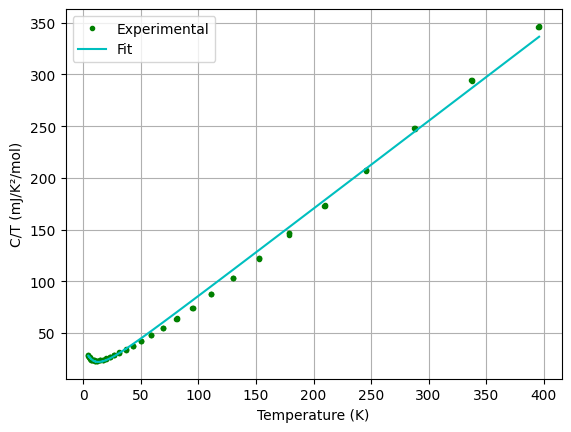

In [2]:
# Between 0 and 20 K

nonlinear_acoustic_fit.plot_fit_acoustic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1, 10,5e-2, 9e-23]))


Beta, Gamma, n, E :  0.7498195730736344 3.1659535682026 0.0012136828535903857 7.904635446382021e-23


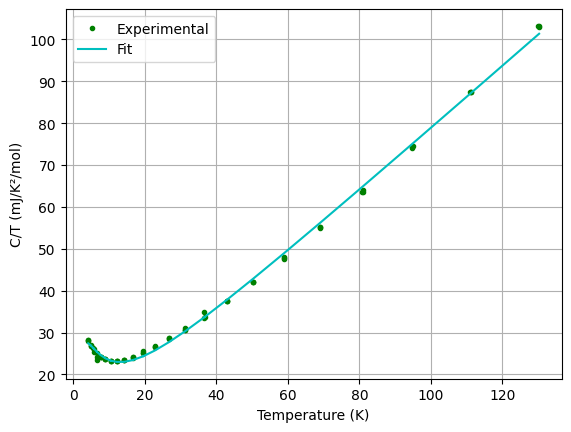

Linear fit with Monte Carlo method : chi2, beta, gamma, n, E : (48.00608490585864, array([7.49619898e-01, 3.31524650e+00, 1.20821226e-03, 7.80264883e-23]))


In [2]:
# Between 0 and 12 K

# With curve fit

nonlinear_acoustic_fit.plot_fit_acoustic(0, 144, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.3, 0, 1e-3, 2e-23],[1, 20,5e-2, 9e-23]))

# With Monte Carlo method

print("Linear fit with Monte Carlo method : chi2, beta, gamma, n, E :", mc.ajustement_mc(cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS,
          nonlinear_acoustic_fit.model_acoustic, 0, 144, 8e6, ([0.7, 0.8], [0, 15], [1e-3, 5e-2], [6e-23, 9e-23]), 4))

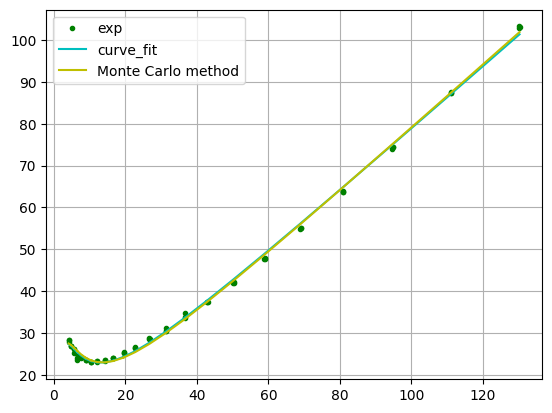

In [5]:
x, y = tools.tab_interval(cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 0,144)

plt.figure()
plt.plot(x,y, ".g", label="exp")
plt.plot(x, nonlinear_acoustic_fit.model_acoustic(x, 0.7498195730736344, 3.1659535682026, 0.0012136828535903857, 7.904635446382021e-23), 
         "-c", label="curve_fit")
plt.plot(x, nonlinear_acoustic_fit.model_acoustic(x, 7.62492974e-01, 1.97649370e+00, 1.25895362e-03, 8.15529588e-23), 
         "-y", label="Monte Carlo method")
plt.grid(True)
plt.legend()


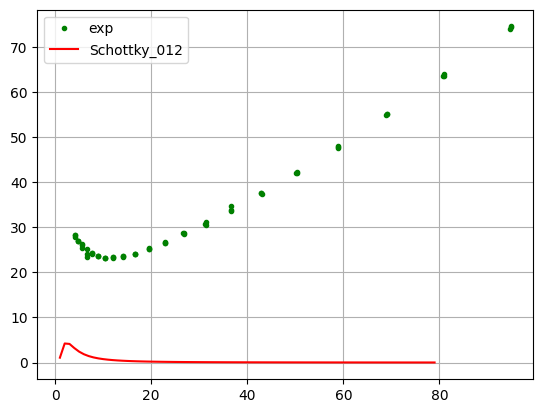

In [4]:
# Plotting the Schottky anomaly and the data on the same graph

squared_temp_bounded, hc_div_T_bounded = tools.tab_interval(cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 0, 100)
temp_test = np.arange(0, 80, 1)

y_fit_012_test = sch.schottky(temp_test,  7.897027012749528e-23, 0.0012118893327018793)

plt.figure()
plt.plot(squared_temp_bounded, hc_div_T_bounded, ".g", label="exp")
plt.plot(temp_test, y_fit_012_test, "-r", label="Schottky_012")
plt.grid(True)
plt.legend()

### Linear fit, Debye model

Optimizing the experimental data from 25 $K^2$ to 400 $K^2$, where the curve seems to be linear and the schottky anomaly tend to 0, according to the Debye model : $y(x) = \beta x + \gamma $

The values really deviate from the expected ones, the gamma cannot be less than 0.

Instead, we perform a linear fit from 5 K to 12 K, so the Debye model should describes better the data. We find $\beta = 0.7225 mJ/K⁴/mol$ and $\gamma = 6.66 mJ/K²/mol$, the corresponding Debye temperature is $327 K$. The values matches the ones found by Monte.

In [3]:

#linear_acoustic_fit.linear_fit(25, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
 #                              cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

<Figure size 640x480 with 0 Axes>

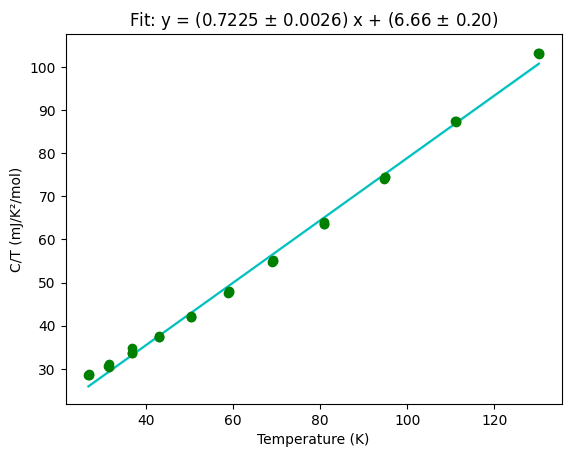

Linear fit with Monte Carlo method : chi2, beta, gamma : (72.69059732458545, array([0.72039436, 6.95777692]))


In [4]:
# Linear fit between 5 and 12 K

linear_acoustic_fit.linear_fit(25, 144, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                               cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

#With Monte Carlo


print("Linear fit with Monte Carlo method : chi2, beta, gamma :", mc.ajustement_mc(cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS,
          mc.model_linear, 25, 144, 8e6, ([0.7, 0.8], [2, 10]), 2))

<Figure size 640x480 with 0 Axes>

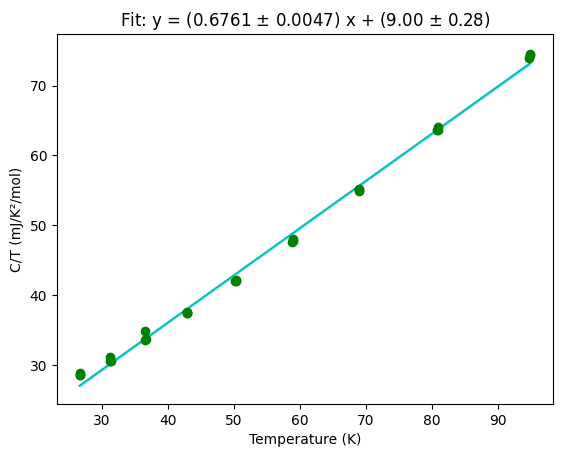

array([6.76111132e-01, 9.00493184e+00, 4.69618650e-03, 2.81780950e-01])

In [2]:
linear_acoustic_fit.linear_fit(25, 100, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                               cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

### Non linear fit, Debye + Einstein model

Fitting the experimental data to the Debye model with a quadratic contribution in temperature, simulating possible optical modes. Optimizing the paramters of the numercial model $y(x) = \beta x + \gamma + \alpha x^2 + Cs(x)$

Between 0 and 20 K :

$\beta = 0.7376 mJ/K^4/mol$, donc $T_D = 324.77 K$ et $\gamma = 2.315 mJ/mol/K^2$. Monte Carlo presents a very large $\chi ²$, so the resultats obtained by this method are not very precises. However, the values are closed to the ones obtained by gradient descent.

Beta, Gamma, n, E, nu :  0.7482220239074074 1.1524233889515587 0.0012884362962614288 8.499999999999998e-23 0.0003342864666692379


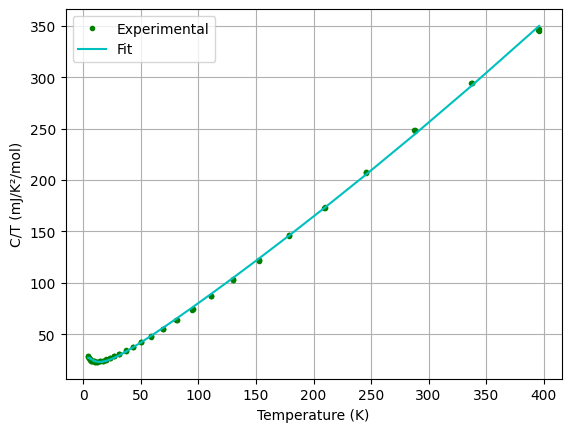

Linear fit with Monte Carlo method : chi2, beta, gamma, n, E; alpha: (21551.94363246548, array([7.00919406e-01, 7.19115007e-02, 1.21532264e-03, 7.61141724e-23,
       3.55086259e-06]))


In [ ]:
nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS, 
                                   bounds = ([0.2, 0, 1e-5, 5e-23, 0],[1, 10, 5e-2, 8.5e-23, 1]))

# With Monte Carlo

print("Linear fit with Monte Carlo method : chi2, beta, gamma, n, E; alpha:", mc.ajustement_mc(cnt.squared_temperature_ISIS, 
                                                    cnt.hc_div_temp_ISIS, nonlinear_optic_fit.model_optic, 
                                                    0, 400, 5e6, ([0.7, 0.8], [0, 13], [5e-4, 9e-3], [5e-23, 8.5e-23], [0, 1e-3]), 5))

### Polynomial fit, Einstein model

Fitting the data after 25 $K^2$, so the Schottky contribution can be neglected

$\beta = 0.7109 mJ/K^4/mol$, donc $T_D = 328 K$ et $\gamma = 5.737 mJ/mol/K^2$. Consistent with Monte Carlo method.

Alpha, Beta, Gamma :  0.0004044077256681254 0.7109603649419937 5.73735654446974


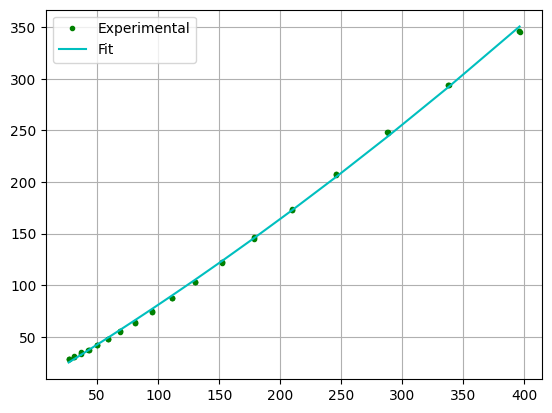

Linear fit with Monte Carlo method : chi2, alpha, beta, gamma : (296.7863875069805, array([4.07752741e-04, 7.09417831e-01, 5.90354420e+00]))


In [7]:
polynomial_optic_fit.plot_fit_quadra(25, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                                     bounds = ([0, 0.5, 0],[1, 1, 20]))

# With Monte Carlo

print("Linear fit with Monte Carlo method : chi2, alpha, beta, gamma :", mc.ajustement_mc(cnt.squared_temperature_ISIS, 
                                                    cnt.hc_div_temp_ISIS, polynomial_optic_fit.model_quadra, 
                                                    25, 400, 7e6, ( [0, 1e-2], [0.7, 0.8], [0, 13]), 3))